# Exploring Covid-19 in Spain using Oficial Data

Se proporcionan la siguiente información a través del [Ministerio de Sanidad](https://cnecovid.isciii.es/covid19/#documentaci%C3%B3n-y-datos): 
* https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_ccaa.csv, Número de casos por técnica diagnóstica y CCAA (de residencia)
* https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_provincia.csv, Número de casos por técnica diagnóstica y provincia (de residencia)

En el siguiente documento se puede encontrar mayor información sobre la definición de las variables: [metadata_ccaa_prov_res.pdf](https://cnecovid.isciii.es/covid19/resources/metadata_ccaa_prov_res.pdf)

### Otras series de datos disponibles:
Se facilitan dos archivos CSV con la siguiente información:

* https://cnecovid.isciii.es/covid19/resources/casos_diag_ccaadecl.csv: Número de casos por técnica diagnóstica y CCAA (de declaración)
* https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv: Número de hospitalizaciones, número de ingresos en UCI y número de defunciones por sexo, edad y provincia de residencia.
En el siguiente documento se puede encontrar mayor información sobre la definición de las variables: [metadata_ccaadecl_prov_edad_sexo.pdf](https://cnecovid.isciii.es/covid19/resources/metadata_ccaadecl_prov_edad_sexo.pdf)

| Código | Nombre de la subdivisión en la ISO1 |
|--------|-------------------------------------|
|ES-AN	 | Andalucía                           |
|ES-AR	 | Aragón                              |
|ES-AS	 | Asturias, Principado de             |
|ES-CN	 | Canarias                            |
|ES-CB	 | Cantabria                           |
|ES-CM	 | Castilla-La Mancha                  |
|ES-CL	 | Castilla y León                     |
|ES-CT	 | Catalunya (Cataluña)                |
|ES-EX	 | Extremadura                         |
|ES-GA	 | Galicia (Galicia)                   |
|ES-IB	 | Illes Balears (Islas Baleares)      |
|ES-RI	 | La Rioja                            |
|ES-MD	 | Madrid, Comunidad de                |
|ES-MC	 | Murcia, Región de                   |
|ES-NC	 | Navarra, Comunidad Foral de/Nafarroako Foru Komunitatea |
|ES-PV	 | País Vasco/Euskadi                  |
|ES-VC	 | Valenciana, Comunidad/Valenciana, Comunitat |

In [1]:
using DataFrames, DataFramesMeta, CSV, Plots, Dates, RollingFunctions

In [2]:
url = "https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_ccaa.csv"

"https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_ccaa.csv"

In [3]:
df = CSV.read(download(url), DataFrame);

In [4]:
describe(df)

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,ccaa_iso,,AN,,VC,0
2,fecha,,2020-01-01,,2021-01-11,0
3,num_casos,294.841,0,55.0,6750,0
4,num_casos_prueba_pcr,254.782,0,50.0,6735,0
5,num_casos_prueba_test_ac,0.658802,0,0.0,96,0
6,num_casos_prueba_ag,38.6299,0,0.0,3158,0
7,num_casos_prueba_elisa,0.461957,0,0.0,80,0
8,num_casos_prueba_desconocida,0.307553,0,0.0,68,0


In [5]:
df_cat = df[df.ccaa_iso .=== "CT", :];
df_mad = df[df.ccaa_iso .=== "MD", :];

In [6]:
dates = df_cat.fecha;

In [7]:
n = 31

dates_month = [dates[i] for i in collect(length(dates)-n:length(dates))]
cat_month = [df_cat.num_casos[i] for i in collect(length(df_cat.num_casos)-n:length(df_cat.num_casos))];
mad_month = [df_mad.num_casos[i] for i in collect(length(df_mad.num_casos)-n:length(df_mad.num_casos))];

In [8]:
df_cat_14 = runmean(df_cat.num_casos, 14);
df_mad_14 = runmean(df_mad.num_casos, 14);

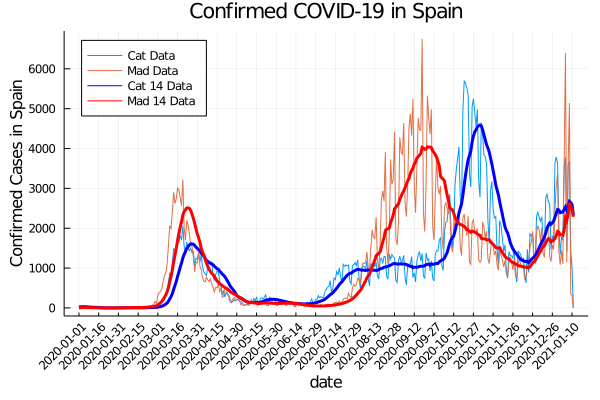

In [9]:
plot(dates, df_cat.num_casos, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Cat Data")
xlabel!("date")
ylabel!("Confirmed Cases in Spain")
title!("Confirmed COVID-19 in Spain")
plot!(dates, df_mad.num_casos, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Mad Data")
plot!(dates, df_cat_14, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Cat 14 Data", lw = 3, c="blue")
plot!(dates, df_mad_14, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Mad 14 Data", lw = 3, c="red")

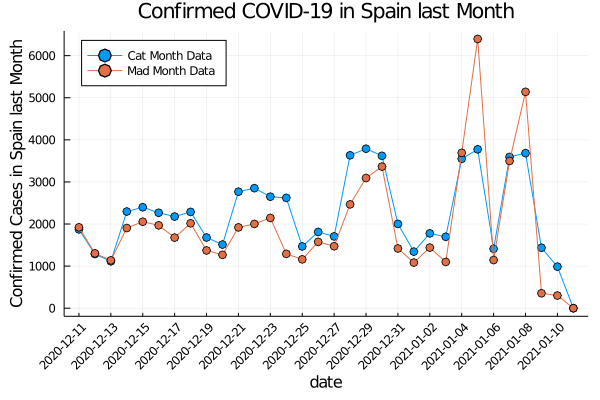

In [10]:
plot(dates_month, cat_month, xticks=dates_month[1:2:end], xrotation=45, leg=:topleft, label="Cat Month Data", m=:o)
xlabel!("date")
ylabel!("Confirmed Cases in Spain last Month")
title!("Confirmed COVID-19 in Spain last Month")
plot!(dates_month, mad_month, xticks=dates_month[1:2:end], xrotation=45, leg=:topleft, label="Mad Month Data", m=:o)

In [11]:
df[(df.fecha .== Date(today()-Day(2))) .& (df.ccaa_iso .=== "CT"), :]

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac
,String,Date,Int64,Int64,Int64
1,CT,2021-01-10,987,987,0


In [12]:
df[(df.fecha .== Date(today()-Day(2))) .& (df.ccaa_iso .=== "MD"), :]

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac
,String,Date,Int64,Int64,Int64
1,MD,2021-01-10,301,145,0


In [13]:
#  import Pkg; Pkg.add("Interact")
  using LinearAlgebra, Plots, Interact

  @manipulate for n in 10:100, w in 200:1000, h in 200:1000
    plot(randn(n),randn(n),seriestype=:scatter,label="n=$(n)",size = (w, h))
  end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16450976965116125347\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9056278123839523506\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16450976965116125347\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 10,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
55, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/development/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/development/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/development/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/development/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/development/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000138c5aad0, Task (runnable) @0x0000000138c5aad0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\"